In [310]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
plt.style.use('fivethirtyeight')

#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

In [202]:
df = pd.read_csv('data.csv', low_memory=False)
df.drop(df.columns[[0]], axis = 1, inplace=True)



In [203]:
df.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.

In [204]:
df.shape

(18207, 88)

In [205]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [206]:
df.set_index('ID', inplace=True)

cols_to_drop = [
    'Club Logo',
    'Photo',
    'Flag',
    'Loaned From',
    'Contract Valid Until',
    'Special',
    
    'LS',
    'ST',
    'RS',
    'LW',
    'LF',
    'CF',
    'RF',
    'RW',
    'LAM',
    'CAM',
    'RAM',
    'LM',
    'LCM',
    'CM',
    'RCM',
    'RM',
    'LWB',
    'LDM',
    'CDM',
    'RDM',
    'RWB',
    'LB',
    'LCB',
    'CB',
    'RCB',
    'RB'
]

df.drop(columns=cols_to_drop, inplace=True)



In [207]:
df['Age'] = df['Age'].astype(int)


In [231]:
#gk <- "GK"
#defs <- positions[str_detect(positions, "B$")]
#mids <- positions[str_detect(positions, "M$")]
#f1 <- positions[str_detect(positions, "F$")]
#f2 <- positions[str_detect(positions, "S$")]
#f3 <- positions[str_detect(positions, "T$")]
#f4 <- positions[str_detect(positions, "W$")]
#fwds <- c(f1, f2, f3, f4)

#https://www.guidetofootball.com/tactics/playing-positions
def position_to_group(col):
    if pd.isnull(col): return None
    if col == 'GK': return col
    
    defenders = {'CB', 'LB', 'RB', 'RWB', 'LWB', 'RCB', 'LCB'}
    midfielders = {'CAM', 'CM', 'CDM', 'LM', 'RM', 'RCM', 'LCM', 'LDM', 'LAM', 'RDM', 'RAM'}
    forwards = {'CF', 'RF', 'LF', 'ST', 'LW', 'RW', 'RS', 'LS'}

    if col in defenders:
        return 'DEF'  
    if col in midfielders:
        return 'MID'
    if col in forwards:
        return 'FWD'  
    
    return col + ' NOT FOUND'

    
#df['Position'].unique()
#df[df['Position'].isnull()]
df['Position Group'] = df['Position'].apply(position_to_group)
df['Position Group'].unique()

array(['FWD', 'GK', 'MID', 'DEF', None], dtype=object)

In [302]:
#fifa_data <- fifa_data %>%
#  mutate(AgeGroup = ifelse(Age <= 20, "20 and under", ifelse(Age > 20 & Age <=25, "21 to 25", ifelse(Age > 25 & Age <= 30, "25 to 30", ifelse(Age > 30 & Age <= 35, "31 to 35", "Over 35")))))

def age_to_group(col):
    if pd.isnull(col): return None
    
    if col <= 20:
        return '<= 20'  
    if col > 20 and col <= 25:
        return '21 to 25'
    if col > 25 and col <= 30:
        return '26 to 30'
    if col > 30 and col <= 35:
        return '31 to 35'
    else:
        return '> 35'

df['Age Group'] = df['Age'].apply(age_to_group)
df['Age Group'].unique()

array(['31 to 35', '26 to 30', '21 to 25', '<= 20', '> 35'], dtype=object)

In [208]:
def value_to_num(col):
    if pd.isnull(col): return 0
    
    value = col.replace('€', '').replace('M', '').replace('K', '')
    
    if col[-1] == 'M': unit = 1e6
    elif col[-1] == 'K': unit = 1e3
    else: unit = 1
    
    return int(float(value)*unit*1.11) # euro dollar rate

df['Value'] = df['Value'].apply(value_to_num)
df['Wage'] = df['Wage'].apply(value_to_num)
df['Release Clause'] = df['Release Clause'].apply(value_to_num)

In [209]:
money_format = '${:,.0f}'
df.head().style.format({'Value': money_format, 'Wage': money_format, 'Release Clause': money_format })

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,Argentina,94,94,FC Barcelona,"$122,655,000","$627,150",Left,5,4,4,Medium/ Medium,Messi,Yes,RF,10,"Jul 1, 2004",5'7,159lbs,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,"$251,415,000"
20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,"$85,470,000","$449,550",Right,5,4,5,High/ Low,C. Ronaldo,Yes,ST,7,"Jul 10, 2018",6'2,183lbs,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11,"$141,081,000"
190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,"$131,535,000","$321,900",Right,5,5,5,High/ Medium,Neymar,Yes,LW,10,"Aug 3, 2017",5'9,150lbs,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11,"$253,191,000"
193080,De Gea,27,Spain,91,93,Manchester United,"$79,920,000","$288,600",Right,4,3,1,Medium/ Medium,Lean,Yes,GK,1,"Jul 1, 2011",6'4,168lbs,17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85,87,88,94,"$153,846,000"
192985,K. De Bruyne,27,Belgium,91,92,Manchester City,"$113,220,000","$394,050",Right,4,5,4,High/ High,Normal,Yes,RCM,7,"Aug 30, 2015",5'11,154lbs,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,61,87,94,79,88,68,58,51,15,13,5,10,13,"$218,004,000"


In [321]:
#https://dfrieds.com/data-visualizations/how-format-large-tick-values
def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)

    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")

    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]

    return new_tick_format


## Analisis de jugadores de futbol internacionales

FIFA 19 es un videojuego de simulación de fútbol desarrollado por EA Sports, como parte de la serie FIFA de Electronic Arts.
El sitio www.sofifa.com expone la información navegable de todos los jugadores del juego. Gracias a un crawler especifico (https://github.com/amanthedorkknight/fifa18-all-player-statistics/tree/master/2019) se obtuvo un dataset de 18 mil jugadores y más de 70 atributos para cada jugador.
Este dataset contiene atributos técnicos de los jugadores, tales como dribbling (regate), potencia, agresion, habilidades como arquero, etc. También incluye información personal como nacionalidad, club, edad, salario, etc.
Se efectuó un pre procesado del dataset para corregir o mejorar algunas variables/dimensiones, más adelante se comentará cual fue el pre procesado realizado.

Objetivos del presente trabajo:
* Realizacion de un analisis exploratorio detallado y encontrar insights (revelaciones).
* Mostrar que características están altamente correlacionadas con la calificación general de un jugador por posición del jugador.
* Analizar las diferencias entre la calificación actual de un jugador y su calificación potencial.
* Averiguar qué equipos tienen el mayor potencial.
* Descubrir los equipos más jóvenes y equipos más avanzados en edad.
* Utilizar clustering kmeans para encontrar 'oportunidades', alguien con las mismas habilidades/potencial pero a un precio menor.


### Preprocesado

El dataset descargado contenia algunas particularidades. La valuacion, el sueldo y la clausula de contrato  estaban formateadas con el simbolo euro (€) y con notación inglesa de millones (M) o miles (K), ejemplo €370K o €95.5M que serian respectivamente 370.000 y 95.500.000 Euros. Se aprovechó el preprocesado para pasar estos valores númericos de Euros a Dólares Estadounidenses con una relación de 1,11 Dólares por cada Euro.
El dataset, en el campo 'Position', disponía de 29 tipos de posiciones para los jugadores, se crearon 3 grupos (DEF, MID, FWD) para mejorar el análisis, mas el grupo de los arqueros (GK).
La edad también fue discretizada en 5 grupos, para poder realizar distintos análisis, se creó una variable nueva con el grupo de edad.


# Analisis exploratorio
HACER LISTADO GENERAL DE COLUMNAS

df.isnull().any()

## Calificación general (Overall)
Se puede observar que la calificación general de los jugadores tiene una distribución normal, con una media de 66.25 y un desvio de 6.90. El mínimo puntaje es 46 y lo posee 1 jugador Ingles. El valor máximo lo tienen Lionel Messi y Cristiano Ronaldo con 94.

In [172]:
df['Overall'].describe()

count    18207.000000
mean        66.238699
std          6.908930
min         46.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: Overall, dtype: float64

In [173]:
df[df['Overall'] == df['Overall'].min()]

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
246269,G. Nugent,16,https://cdn.sofifa.org/players/4/19/246269.png,England,https://cdn.sofifa.org/flags/14.png,46,66,Tranmere Rovers,66600,1110,1321,Right,1.0,3.0,2.0,Medium/ Medium,Lean,No,CM,33.0,"Oct 30, 2018",5'10,176lbs,43+2,43+2,43+2,45+2,44+2,44+2,44+2,45+2,45+2,45+2,45+2,46+2,45+2,45+2,45+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,47+2,47+2,47+2,46+2,41.0,34.0,46.0,48.0,30.0,43.0,40.0,34.0,44.0,51.0,57.0,55.0,55.0,51.0,63.0,43.0,62.0,47.0,60.0,32.0,56.0,42.0,34.0,49.0,33.0,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,183150


In [174]:
df[df['Overall'] == df['Overall'].max()]

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,122655000,627150,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,251415000
20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,85470000,449550,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,141081000


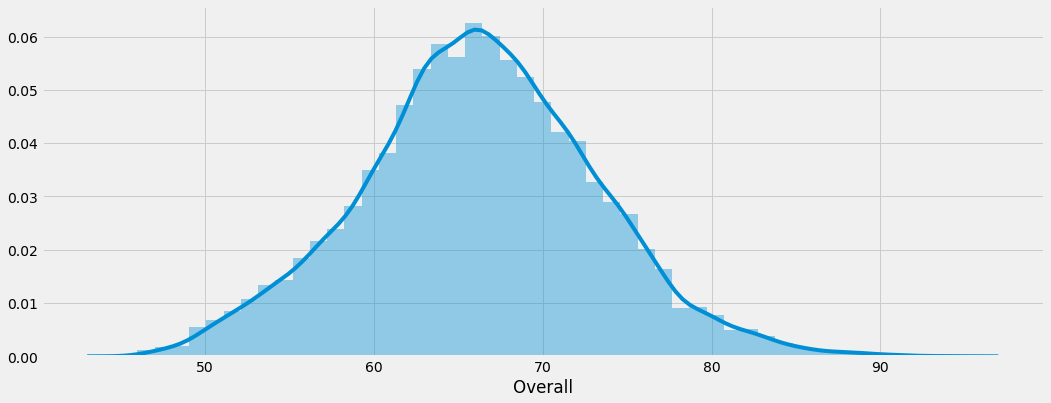

In [213]:
plt.figure(figsize=(16, 6))
sns.distplot(df['Overall'], bins=47)

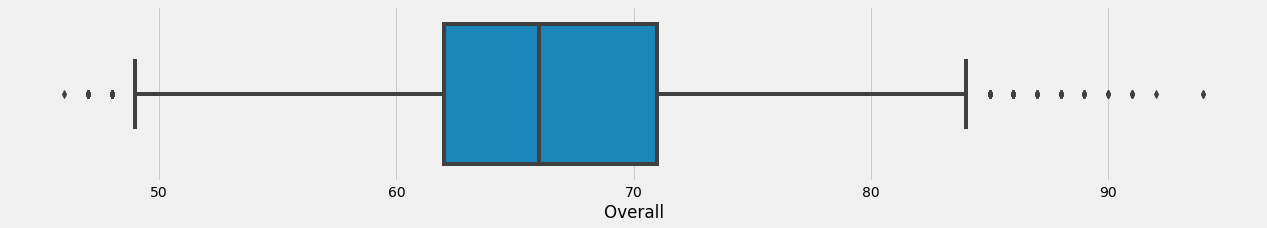

In [176]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=df['Overall'])

la calificación de los zurdos es mejor, seguir desarrollando...

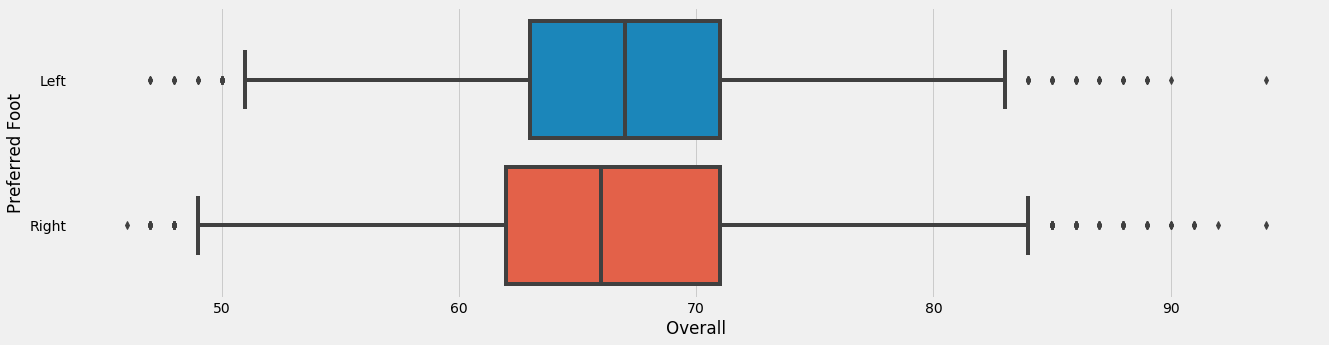

In [178]:
# overall entre zurdos y diestros
plt.figure(figsize=(20, 5))
sns.boxplot(x='Overall', y='Preferred Foot', data=df)

### Edad vs Calificación General (Overall)
En este aspecto de edad en relación a la calificación promedio para esa edad se observa lo siguiente. Cuando se trata de la calificación general de un jugador, parece como si la calificación de los jugadores estuviera creciendo hasta alrededor de los 30 años de edad, punto cúlmine de su carrera.. De los 30 a los 35, la calificacion promedio se mantiene, podriamos decir que generalmente un jugador de 30 a 35 años esta en su etapa de meseta deportiva. Luego comienzan el inevitable declive alrededor de los 35 años, pero justamente vemos en el grafico, que el intervalo de confianza (95%) a partir de los 30 comienza a ampliarse, ya que tenemos menos jugadores de esas edades y sus calificaciones son dispares. Ese pico a los 45 años se debe al Mexicano O. Perez (calificación 71), esta persona seria outlier. Luego de los 42 años inclusive, tenemos solo 3 jugadores, 42, 44 y 45 años. Es por eso que no hay intervalo de confianza para esas edades.

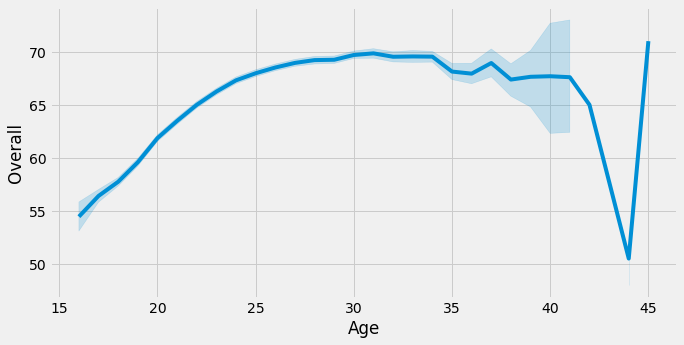

In [179]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="Age", y="Overall", data=df)

Invertidamente, podemos observar que desde la calificación minima (47) que tenemos en el dataset hasta un 70, hay una relacón directa (correlación) con la edad, que se meseta en los casi 28 años.

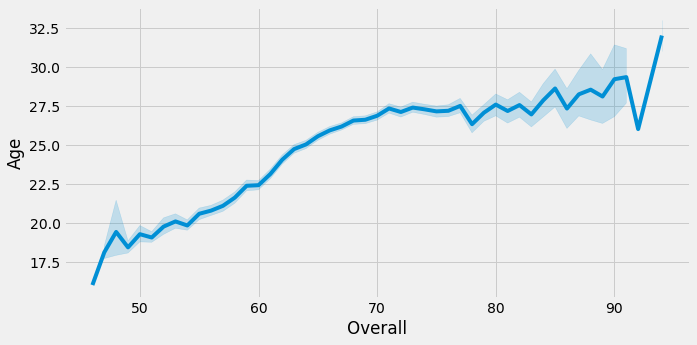

In [180]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="Overall", y="Age", data=df)

In [216]:
df[df['Age'] >= 40].sort_values(by=['Age'])

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1179,G. Buffon,40,Italy,88,88,Paris Saint-Germain,4440000,85470,Right,4.0,2.0,1.0,Medium/ Medium,Normal,Yes,GK,1.0,"Jul 6, 2018",6'4,203lbs,13.0,15.0,13.0,37.0,17.0,26.0,20.0,13.0,35.0,28.0,49.0,43.0,55.0,79.0,49.0,39.0,75.0,39.0,69.0,13.0,38.0,28.0,12.0,50.0,22.0,70.0,13.0,11.0,11.0,88.0,87.0,74.0,90.0,83.0,8214000
219344,A. Al Basisi,40,Saudi Arabia,57,57,Ohod Club,11100,1110,Right,1.0,3.0,1.0,Medium/ Medium,Stocky,No,GK,22.0,"Aug 1, 2014",6'0,190lbs,16.0,19.0,15.0,21.0,11.0,13.0,20.0,19.0,18.0,20.0,46.0,49.0,38.0,50.0,49.0,19.0,58.0,37.0,79.0,17.0,22.0,25.0,17.0,16.0,28.0,42.0,30.0,13.0,20.0,57.0,55.0,54.0,58.0,57.0,18870
28157,P. van der Vlag,40,Netherlands,58,58,FC Emmen,11100,1110,Right,1.0,3.0,1.0,Medium/ Medium,Normal,No,GK,1.0,"Jul 20, 2017",6'1,168lbs,12.0,11.0,15.0,28.0,17.0,15.0,21.0,12.0,25.0,26.0,30.0,28.0,25.0,51.0,25.0,19.0,60.0,27.0,60.0,15.0,31.0,21.0,9.0,39.0,11.0,45.0,12.0,15.0,17.0,54.0,63.0,59.0,61.0,51.0,16650
156480,Y. Nakazawa,40,Japan,61,61,Yokohama F. Marinos,0,1110,Right,2.0,3.0,2.0,Low/ High,Normal,No,CB,22.0,"Jan 1, 2002",6'2,172lbs,44.0,40.0,67.0,62.0,40.0,40.0,47.0,35.0,59.0,63.0,29.0,30.0,28.0,41.0,50.0,59.0,42.0,28.0,55.0,21.0,69.0,61.0,21.0,66.0,31.0,69.0,64.0,64.0,57.0,10.0,9.0,7.0,9.0,8.0,0
214372,W. Díaz,40,Colombia,63,63,Jaguares de Córdoba,0,1110,Right,1.0,3.0,2.0,Low/ Medium,Stocky,No,LCB,18.0,"Jan 10, 2016",5'10,168lbs,56.0,19.0,71.0,47.0,24.0,38.0,27.0,23.0,32.0,45.0,32.0,33.0,52.0,56.0,67.0,40.0,83.0,31.0,72.0,17.0,72.0,57.0,30.0,29.0,35.0,55.0,71.0,61.0,53.0,9.0,13.0,12.0,13.0,9.0,0
49511,F. Kippe,40,Norway,65,65,Lillestrøm SK,0,1110,Left,1.0,3.0,2.0,Low/ Medium,Normal,No,LCB,13.0,"Feb 22, 2002",6'4,214lbs,33.0,46.0,70.0,56.0,43.0,24.0,51.0,53.0,55.0,49.0,24.0,25.0,27.0,66.0,31.0,70.0,44.0,41.0,93.0,52.0,76.0,63.0,40.0,49.0,62.0,64.0,62.0,58.0,55.0,14.0,9.0,10.0,6.0,11.0,0
100899,S. Phillips,40,England,52,52,Yeovil Town,0,1110,Right,1.0,3.0,1.0,Medium/ Medium,Normal,No,GK,25.0,"Aug 1, 2017",6'1,165lbs,13.0,15.0,11.0,15.0,13.0,15.0,12.0,13.0,15.0,22.0,28.0,32.0,38.0,57.0,33.0,12.0,44.0,23.0,53.0,12.0,34.0,18.0,14.0,10.0,13.0,63.0,15.0,12.0,17.0,48.0,54.0,47.0,53.0,46.0,0
176540,B. Castillo,40,Colombia,66,66,Atlético Huila,44400,1110,Right,1.0,1.0,1.0,Medium/ Medium,Normal,No,GK,1.0,"Jan 6, 2017",6'1,190lbs,12.0,10.0,20.0,25.0,12.0,16.0,14.0,11.0,21.0,23.0,34.0,42.0,37.0,64.0,40.0,25.0,42.0,30.0,60.0,9.0,23.0,21.0,13.0,45.0,24.0,26.0,30.0,10.0,19.0,60.0,66.0,64.0,73.0,63.0,59940
156483,C. Lucchetti,40,Argentina,71,71,Atlético Tucumán,177600,4440,Right,1.0,3.0,1.0,Medium/ Medium,Normal,No,GK,1.0,"Jul 25, 2012",6'0,152lbs,23.0,13.0,23.0,34.0,18.0,24.0,27.0,30.0,32.0,35.0,40.0,45.0,44.0,69.0,45.0,40.0,62.0,35.0,55.0,16.0,45.0,17.0,16.0,51.0,54.0,41.0,21.0,22.0,13.0,71.0,68.0,75.0,64.0,75.0,266400


#### Edad vs calificación general por posición
Puede observarse que desde los 18 hasta los 21 años, los jugadores de todas las posiciones tienen una calificación similar. Desde los 21 hasta los 26 años aproximadamente la calificación de los mediocampistas es superior, y a partir de los 26 es cuando vemos que los delanteros superan a los mediocampistas hasta el fin de su carrera. A los 34 años los mediocampistas y defensores tienen su declive, mientras que en los delanteros, no es tan notable. 

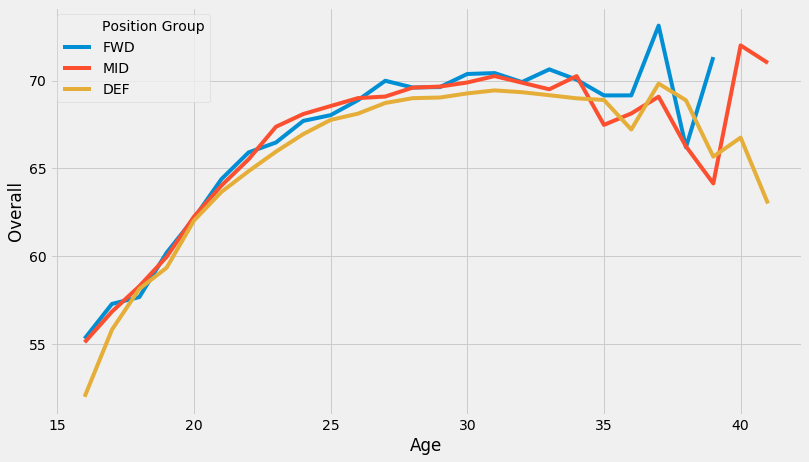

In [237]:
csns.lineplot(x="Age", y="Overall", hue="Position Group", ci=None, data=df[df["Position Group"]!='GK'])

### Valuación de los jugadores
Las valoraciones de los jugadores muestran un sesgo muy positivo, siendo sesgado por estrellas como Messi, Neymar, De Bryune, Hazard y Dybala. Estos jugadores y otros mas forman una larga cola, propia de outliers.

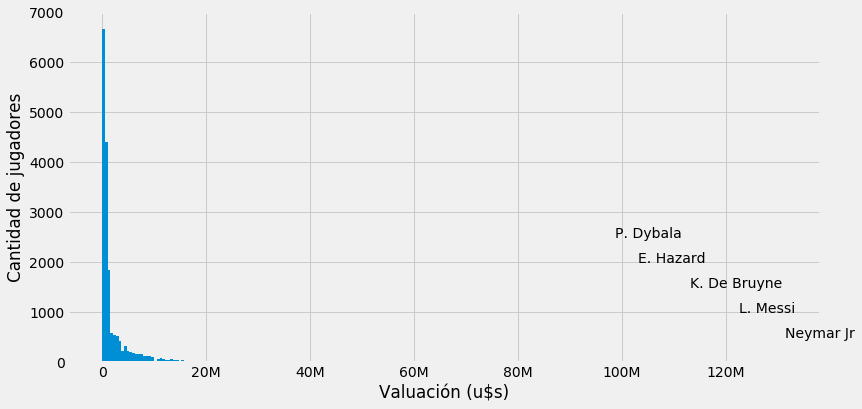

In [294]:



num_bins = 250

fig, ax = plt.subplots(figsize=(12,6))

most_expensive_players_df = df.sort_values(by=['Value'], ascending=False)[['Name', 'Value']].head()

axis_y_height = 500
for index, row in most_expensive_players_df.iterrows():
    ax.annotate(row['Name'], (row['Value'], axis_y_height))
    axis_y_height = axis_y_height + 500

ax.hist(df['Value'], num_bins)
#formatter = ticker.FormatStrFormatter('$%1.2f')
#ax.xaxis.set_major_formatter(formatter)
ax.set_xlabel('Valuación (u$s)')
ax.set_ylabel('Cantidad de jugadores')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values));


### Edad vs valuaciones
Es intuitivo pensar que los jugadores mejoran con la edad y la experiencia y que sus valoraciones reflejarán esta relación.

Al trazar la relación a continuación, se puede ver que a medida que los jugadores envejecen, sus valoraciones tienden a aumentar hasta los 30 años, y luego comienzan a disminuir en los años de edad entre los 31 y los 35 años, y luego disminuyen rápidamente en el caso de los jugadores mayores de 35 años. Esto concuerda con un analisis anterior, cuando se analizó la calificación general en función de la edad del jugador. Las valuaciones del grafico se encuentran en escala logaritmica, asi las diferencias entre los grupos de edades son significativas.

<Figure size 864x504 with 0 Axes>

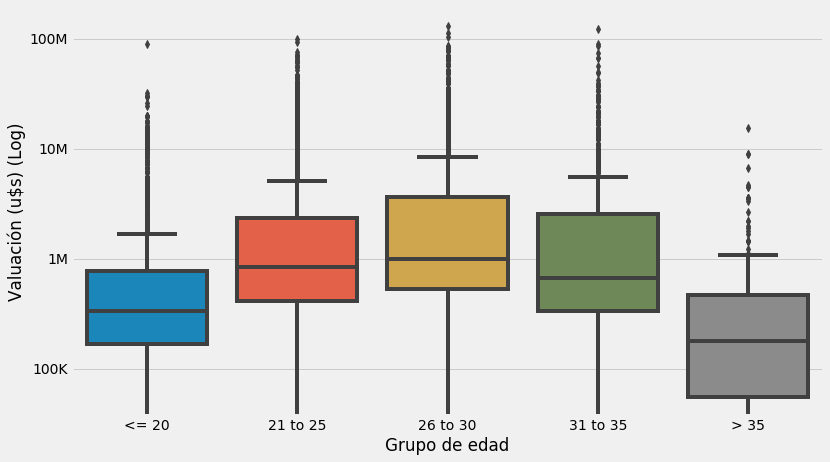

In [320]:
plt.figure(figsize=(12, 7))
f, ax = plt.subplots(figsize=(12, 7))
#ax.set_title('Mean Loans given by Kiva, by Country and Gender')
ax.set_yscale("log")

sns.boxplot(x="Age Group", y="Value", data=df, order=["<= 20", "21 to 25", "26 to 30", "31 to 35", "> 35"])

ax.set_xlabel('Grupo de edad')
ax.set_ylabel('Valuación (u$s) (Log)')

#fmt = '${x:,.0f}'
#tick = ticker.StrMethodFormatter(fmt)
#ax.yaxis.set_major_formatter(reformat_large_tick_values)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values));


### Posiciones vs valuaciones
Como era de esperar, los delanteros y mediocampistas son más caros que defensores y arqueros.

Específicamente, los delanteros de izquierda (LF) y derecha (RW) y los delanteros de ataque de izquierda (LAM) y derecha (RAM) son las posiciones más caras.


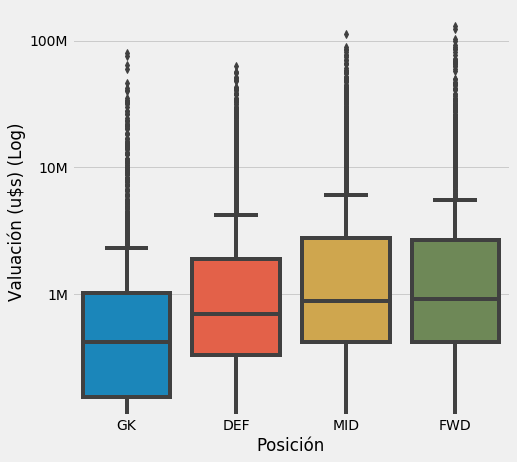

In [398]:
#plt.figure(figsize=(12, 7))
f, ax = plt.subplots(figsize=(7, 7))
#ax.set_title('Mean Loans given by Kiva, by Country and Gender')
ax.set_yscale("log")

sns.boxplot(x="Position Group", y="Value", data=df, order=["GK", "DEF", "MID", "FWD"])

ax.set_xlabel('Posición')
ax.set_ylabel('Valuación (u$s) (Log)')

#fmt = '${x:,.0f}'
#tick = ticker.StrMethodFormatter(fmt)
#ax.yaxis.set_major_formatter(reformat_large_tick_values)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values));

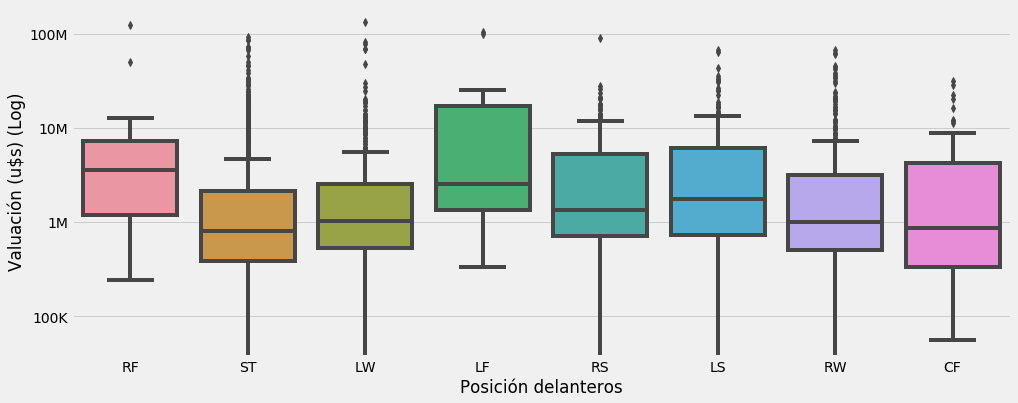

In [392]:
#plt.figure(figsize=(12, 7))
f, ax = plt.subplots(figsize=(15, 6))
#ax.set_title('Mean Loans given by Kiva, by Country and Gender')
ax.set_yscale("log")

sns.boxplot(x="Position", y="Value", data=df[df['Position Group'] == 'FWD'])


ax.set_xlabel('Posición delanteros')
ax.set_ylabel('Valuación (u$s) (Log)')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values));


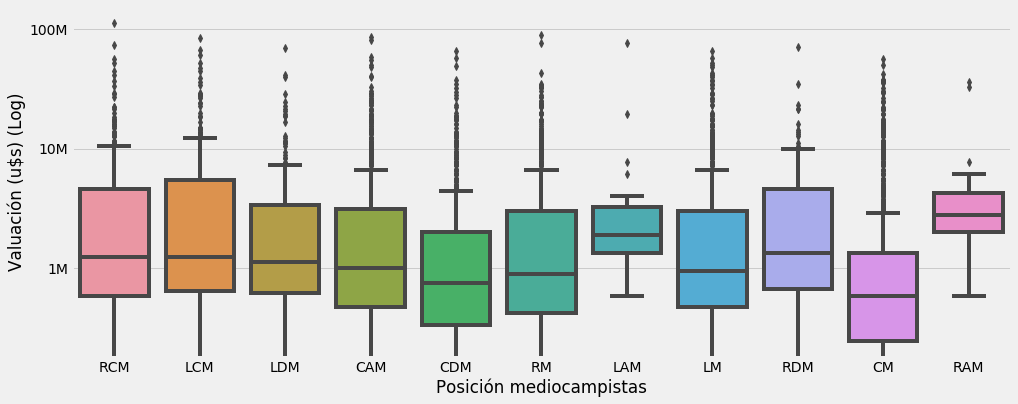

In [394]:
#plt.figure(figsize=(12, 7))
f, ax = plt.subplots(figsize=(15, 6))
#ax.set_title('Mean Loans given by Kiva, by Country and Gender')
ax.set_yscale("log")

sns.boxplot(x="Position", y="Value", data=df[df['Position Group'] == 'MID'])


ax.set_xlabel('Posición mediocampistas')
ax.set_ylabel('Valuación (u$s) (Log)')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values));


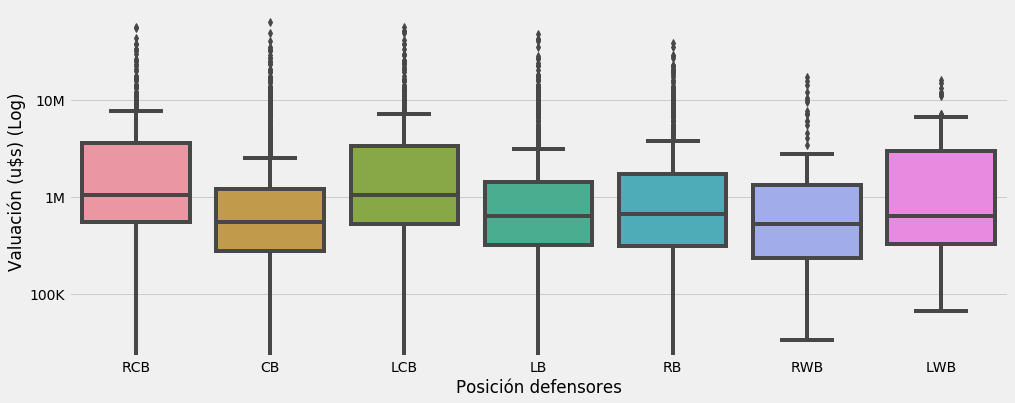

In [393]:
#plt.figure(figsize=(12, 7))
f, ax = plt.subplots(figsize=(15, 6))
#ax.set_title('Mean Loans given by Kiva, by Country and Gender')
ax.set_yscale("log")

sns.boxplot(x="Position", y="Value", data=df[df['Position Group'] == 'DEF'])


ax.set_xlabel('Posición defensores')
ax.set_ylabel('Valuación (u$s) (Log)')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values));


### Calificaciones vs Valuaciones
Existe una fuerte relación positiva entre la calificación y la valuación de los jugadores con una correlación de Spearman de 0,9081. Se utilizó el método Spearman para calcular la correlación debido a la presencia de grandes valores atípicos.


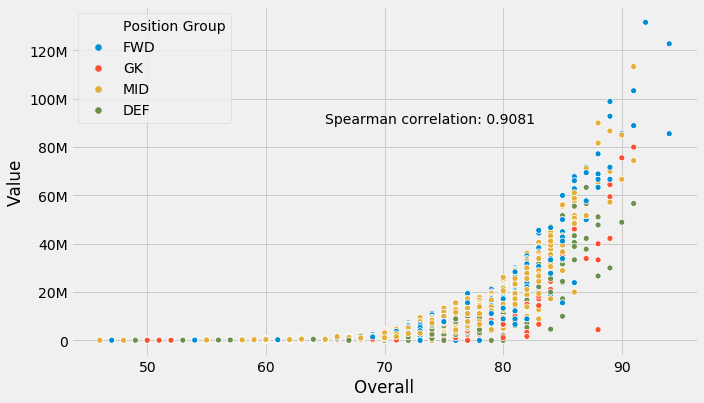

In [432]:
correlation = df[['Value', 'Overall']].corr(method='spearman').iloc[0,1]

f, ax = plt.subplots(figsize=(10, 6))

ax.annotate('Spearman correlation: {:.4f}'.format(correlation), (65, 90000000))

sns.scatterplot(x="Overall", y="Value", data=df, hue="Position Group")


ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values));

